## CARDIOVASCULAR HEALTH ASSESSMENT & RISK PREDICTION MODEL

### PROBLEM STATEMENT:
- Visiting hospitals for regular check-ups it is almost always seen that they encourage people to get special check-ups to identify if they are at risk of heart diseases. Heart diseases have unfortunately become very common. It may be due to various reasons such as lifestyle, work pressure, lack of exercise, etc. In this project, we will be working on predicting the 10-year risk of Coronary Heart Disease (CHD), We are given a set of variables that impact heart diseases. These variables are related to demographic, past, and current medical history.
- 
The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients' information. It include over 3390 records and 16 attributes Variables. Each attribute is a potential risk factor. There are both demographic, behavioural, and medical risk factors

## OBJECTIVE : 
- BUILD A MACHINE LEARNING MODEL TO PREDICT IF A PERSON WILL HAVE TEN YEAR RISK OF CORONARY HEART DISEASE THROUGH GIVEN SET OF FEATURES 

## DATA DICTIONARY 

## Demographic:
- Sex : male or female (Nominal)
- 
Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuos
## Education
- 1- High secensory , 2- Graduate , 3- Post Graduate , 4- Doctarate/Phd.d
## Behavioural:
- Is smoking: oker: whether or not the patient is a current smoker (No
- Cigs per dayPer Day: the number of cigarettes that the person in one day.

## Medical history
- BP Meds: whether or not the patient was on blood pressure medication (Nominal)
- Prevalant stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
- Diabetes: whether or not the patient had diabetes (Nominal)

## Medical Current
- Tot Chol: total cholesterol level (Continuous)
- 
Tot Chol: total cholesterol levl (Continuous)
- Sys BP: systolic blood pressure (Continuous)
- Dia BP: diastolic blood pressure (Continuous)
- BMI: Body Mass Index (Continuous)
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous
- Glucose: glucose level (Continuous)

## Target Variable:
- Ten year risk of coronary heart disease (CHD) - (binary: “1”, means “Yes”, “0” means “No”)“Ys”, “0” means “No”)


## Importing basic libraries and reading the data:

In [4]:
# Data manipulation
import numpy as np
import pandas as pd

# Plotting and visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Statistical libraries
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,roc_auc_score,roc_curve,classification_report,r2_score, recall_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings("ignore")

In [5]:
# Reading the data
df = pd.read_csv('data_cardiovascular_risk.csv')

# To display first 5 rows in the dataframe 
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [6]:
# To know the data type
df.dtypes

id                   int64
age                  int64
education          float64
sex                 object
is_smoking          object
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

Converting the object coloumns (sex , is_smoking) to int as both can be converted to binary values 
 
 FOR COLUMN 'sex' 
  -F --> 0
  -M --> 1

 FOR COLUMN 'is_smoking'
  -YES --> 1
  -NO  --> 0

In [8]:
df['sex'] = df['sex'].replace({'F':0,'M':1})
df['is_smoking'] = df['is_smoking'].replace({'NO':0,'YES':1}) 
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [9]:
# To re verify changed datatypes
df.dtypes

id                   int64
age                  int64
education          float64
sex                  int64
is_smoking           int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [10]:
#To check for null values if any
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

- From df.isnull() we can see that there are null values. Hence handling missing values is important.

## Handling missing values:

In [11]:
# Percentage of null values in each column
(df.isnull().sum()/df.shape[0])*100

id                 0.000000
age                0.000000
education          2.566372
sex                0.000000
is_smoking         0.000000
cigsPerDay         0.648968
BPMeds             1.297935
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.120944
sysBP              0.000000
diaBP              0.000000
BMI                0.412979
heartRate          0.029499
glucose            8.967552
TenYearCHD         0.000000
dtype: float64

##### Missing values for the column eduction indicates no education. Hence filling the missing values with '0':

In [12]:
df.education.fillna(0,inplace=True)

##### Missing values in column cigsPerDay are only from smokers, hence imputing it with median of is_smoking = 1:

In [13]:
df.cigsPerDay.fillna(df.cigsPerDay.where(df.is_smoking==1).median(),inplace=True)

##### Missing values in column BPMeds indicates they are not on medication, hence filling missing values with '0':

In [14]:
df.BPMeds.fillna(0,inplace=True)

##### Missing values in column totChol are being imputed with median:

In [15]:
df['totChol'].fillna(df.totChol.median(),inplace=True)

##### Missing values in column BMI are being imputed with median:

In [16]:
df['BMI'].fillna(df.BMI.median(),inplace=True)

##### In column heartRate, there is only 1 missing value in the column and its for active smoker, hence filling it with median heartrate for is_smoking =1:

In [17]:
df['heartRate'].fillna(df['heartRate'].where(df['is_smoking']==1).median(),inplace=True)

##### In column glucose, apart from 3 values all of missing values are non diabetic so imputing median of non diabetic

In [18]:
df['glucose'].fillna(df['glucose'].where(df['diabetes']==0).median(),inplace=True)

In [19]:
# Checking if there are any misisng values left :
(df.isnull().sum()/df.shape[0])*100

id                 0.0
age                0.0
education          0.0
sex                0.0
is_smoking         0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
TenYearCHD         0.0
dtype: float64

In [20]:
# To know combined sumary of data types & values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3390 non-null   float64
 3   sex              3390 non-null   int64  
 4   is_smoking       3390 non-null   int64  
 5   cigsPerDay       3390 non-null   float64
 6   BPMeds           3390 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3390 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3390 non-null   float64
 14  heartRate        3390 non-null   float64
 15  glucose          3390 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

- All missing values have been handled

In [21]:
# Dropping column 'ID' as its irrelevant for model
df.drop(['id'],axis=1,inplace=True)

In [22]:
# Five point summary of clean data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.0000,70.0
education,3390.0,1.920354,1.053104,0.00,1.00,2.00,3.0000,4.0
sex,3390.0,0.432743,0.495529,0.00,0.00,0.00,1.0000,1.0
is_smoking,3390.0,0.497640,0.500068,0.00,0.00,0.00,1.0000,1.0
cigsPerDay,3390.0,9.140413,11.872952,0.00,0.00,0.00,20.0000,70.0
BPMeds,3390.0,0.029499,0.169224,0.00,0.00,0.00,0.0000,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.0000,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.0000,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.0000,1.0
totChol,3390.0,237.039823,44.994205,107.00,206.00,234.00,264.0000,696.0


## Visualising the data

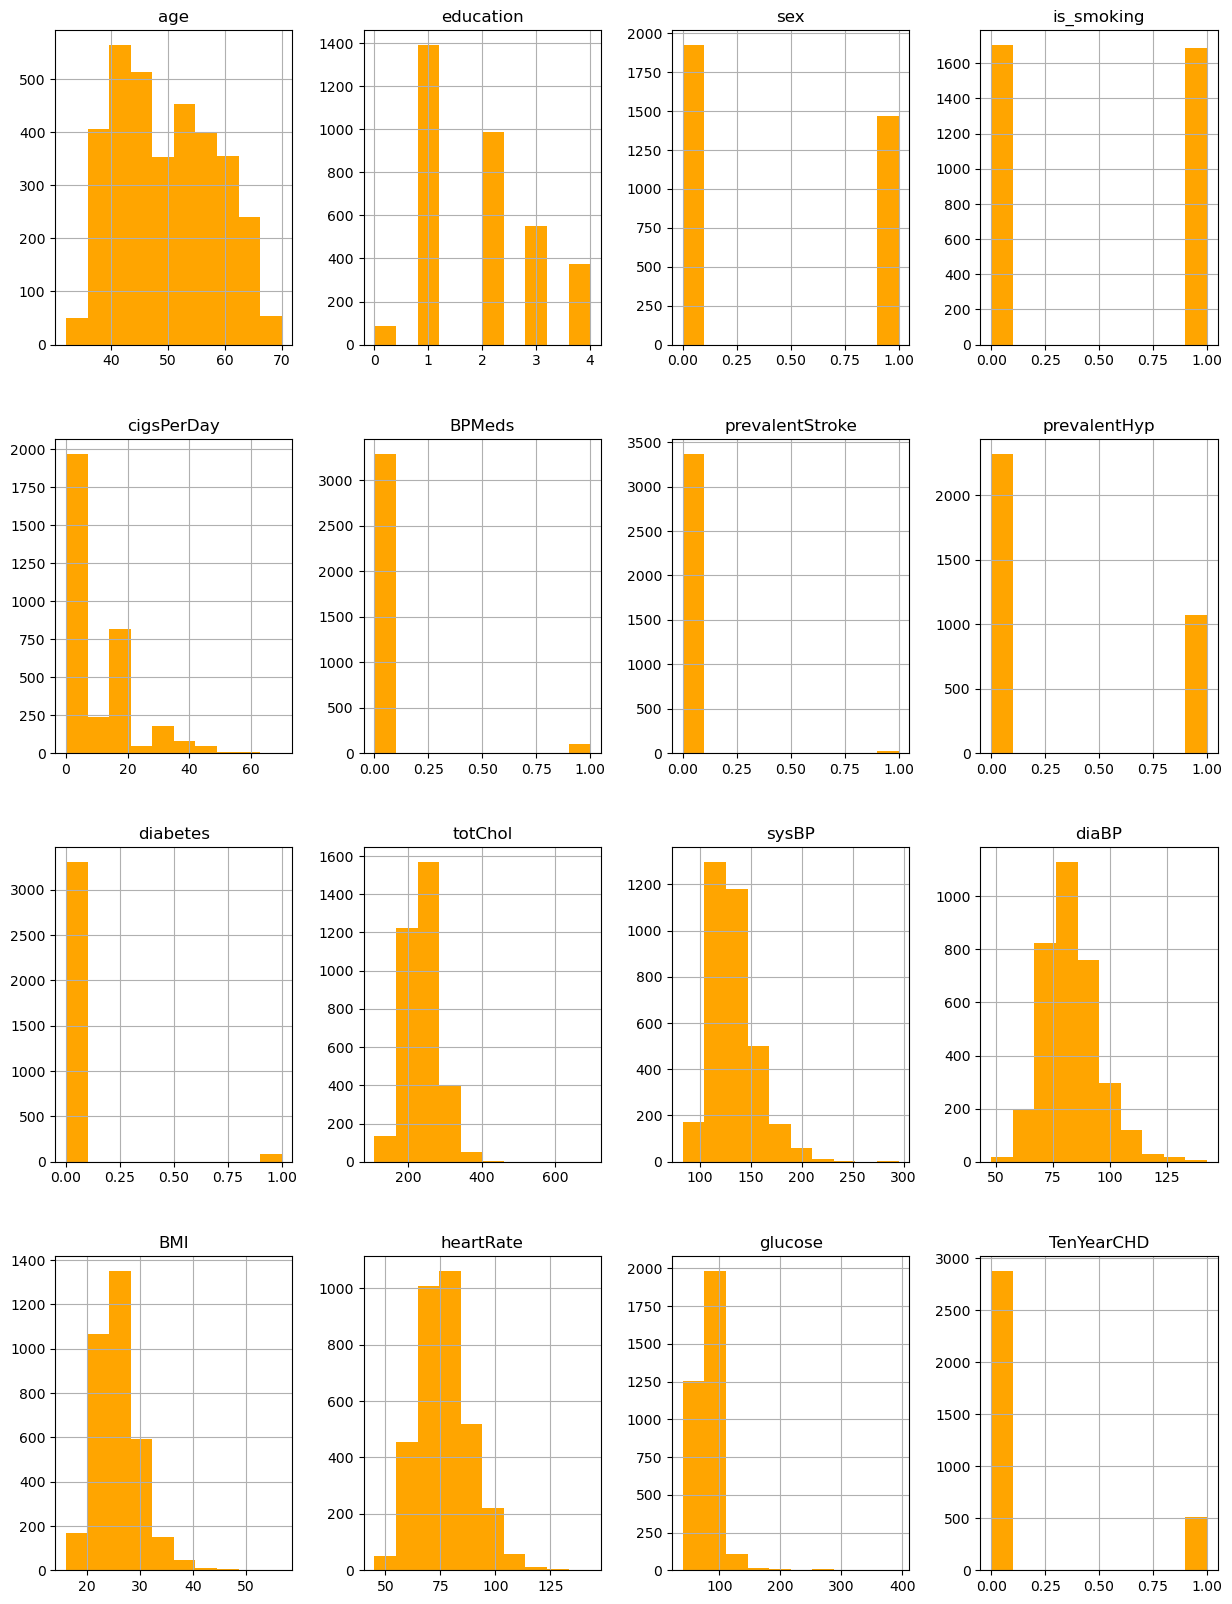

In [23]:
# checking distributions using histograms
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax,color = 'Orange')
plt.show()

# Observations

1. VERY FEW PEOPLE TAKE BP MEDS
2. PEOPLE WITH PREVALANT STROKE ARE NEGLIGIBLE
3. MOST PEOPLE DONT HAVE DIABETES
4. MALE TO FEMALE RATIO IS ALMOST SAME
5. NO. OF PEOPLE SMOKING & NOT SMOKING ARE EQUAL
6. TenYearCHD HAS LESS OF 1 VALUES THAN 0


In [24]:
# Names of columns of dataframe
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [25]:
# List of columns names with contineous values
cont = ['age','totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [26]:
sns.set_style("whitegrid")

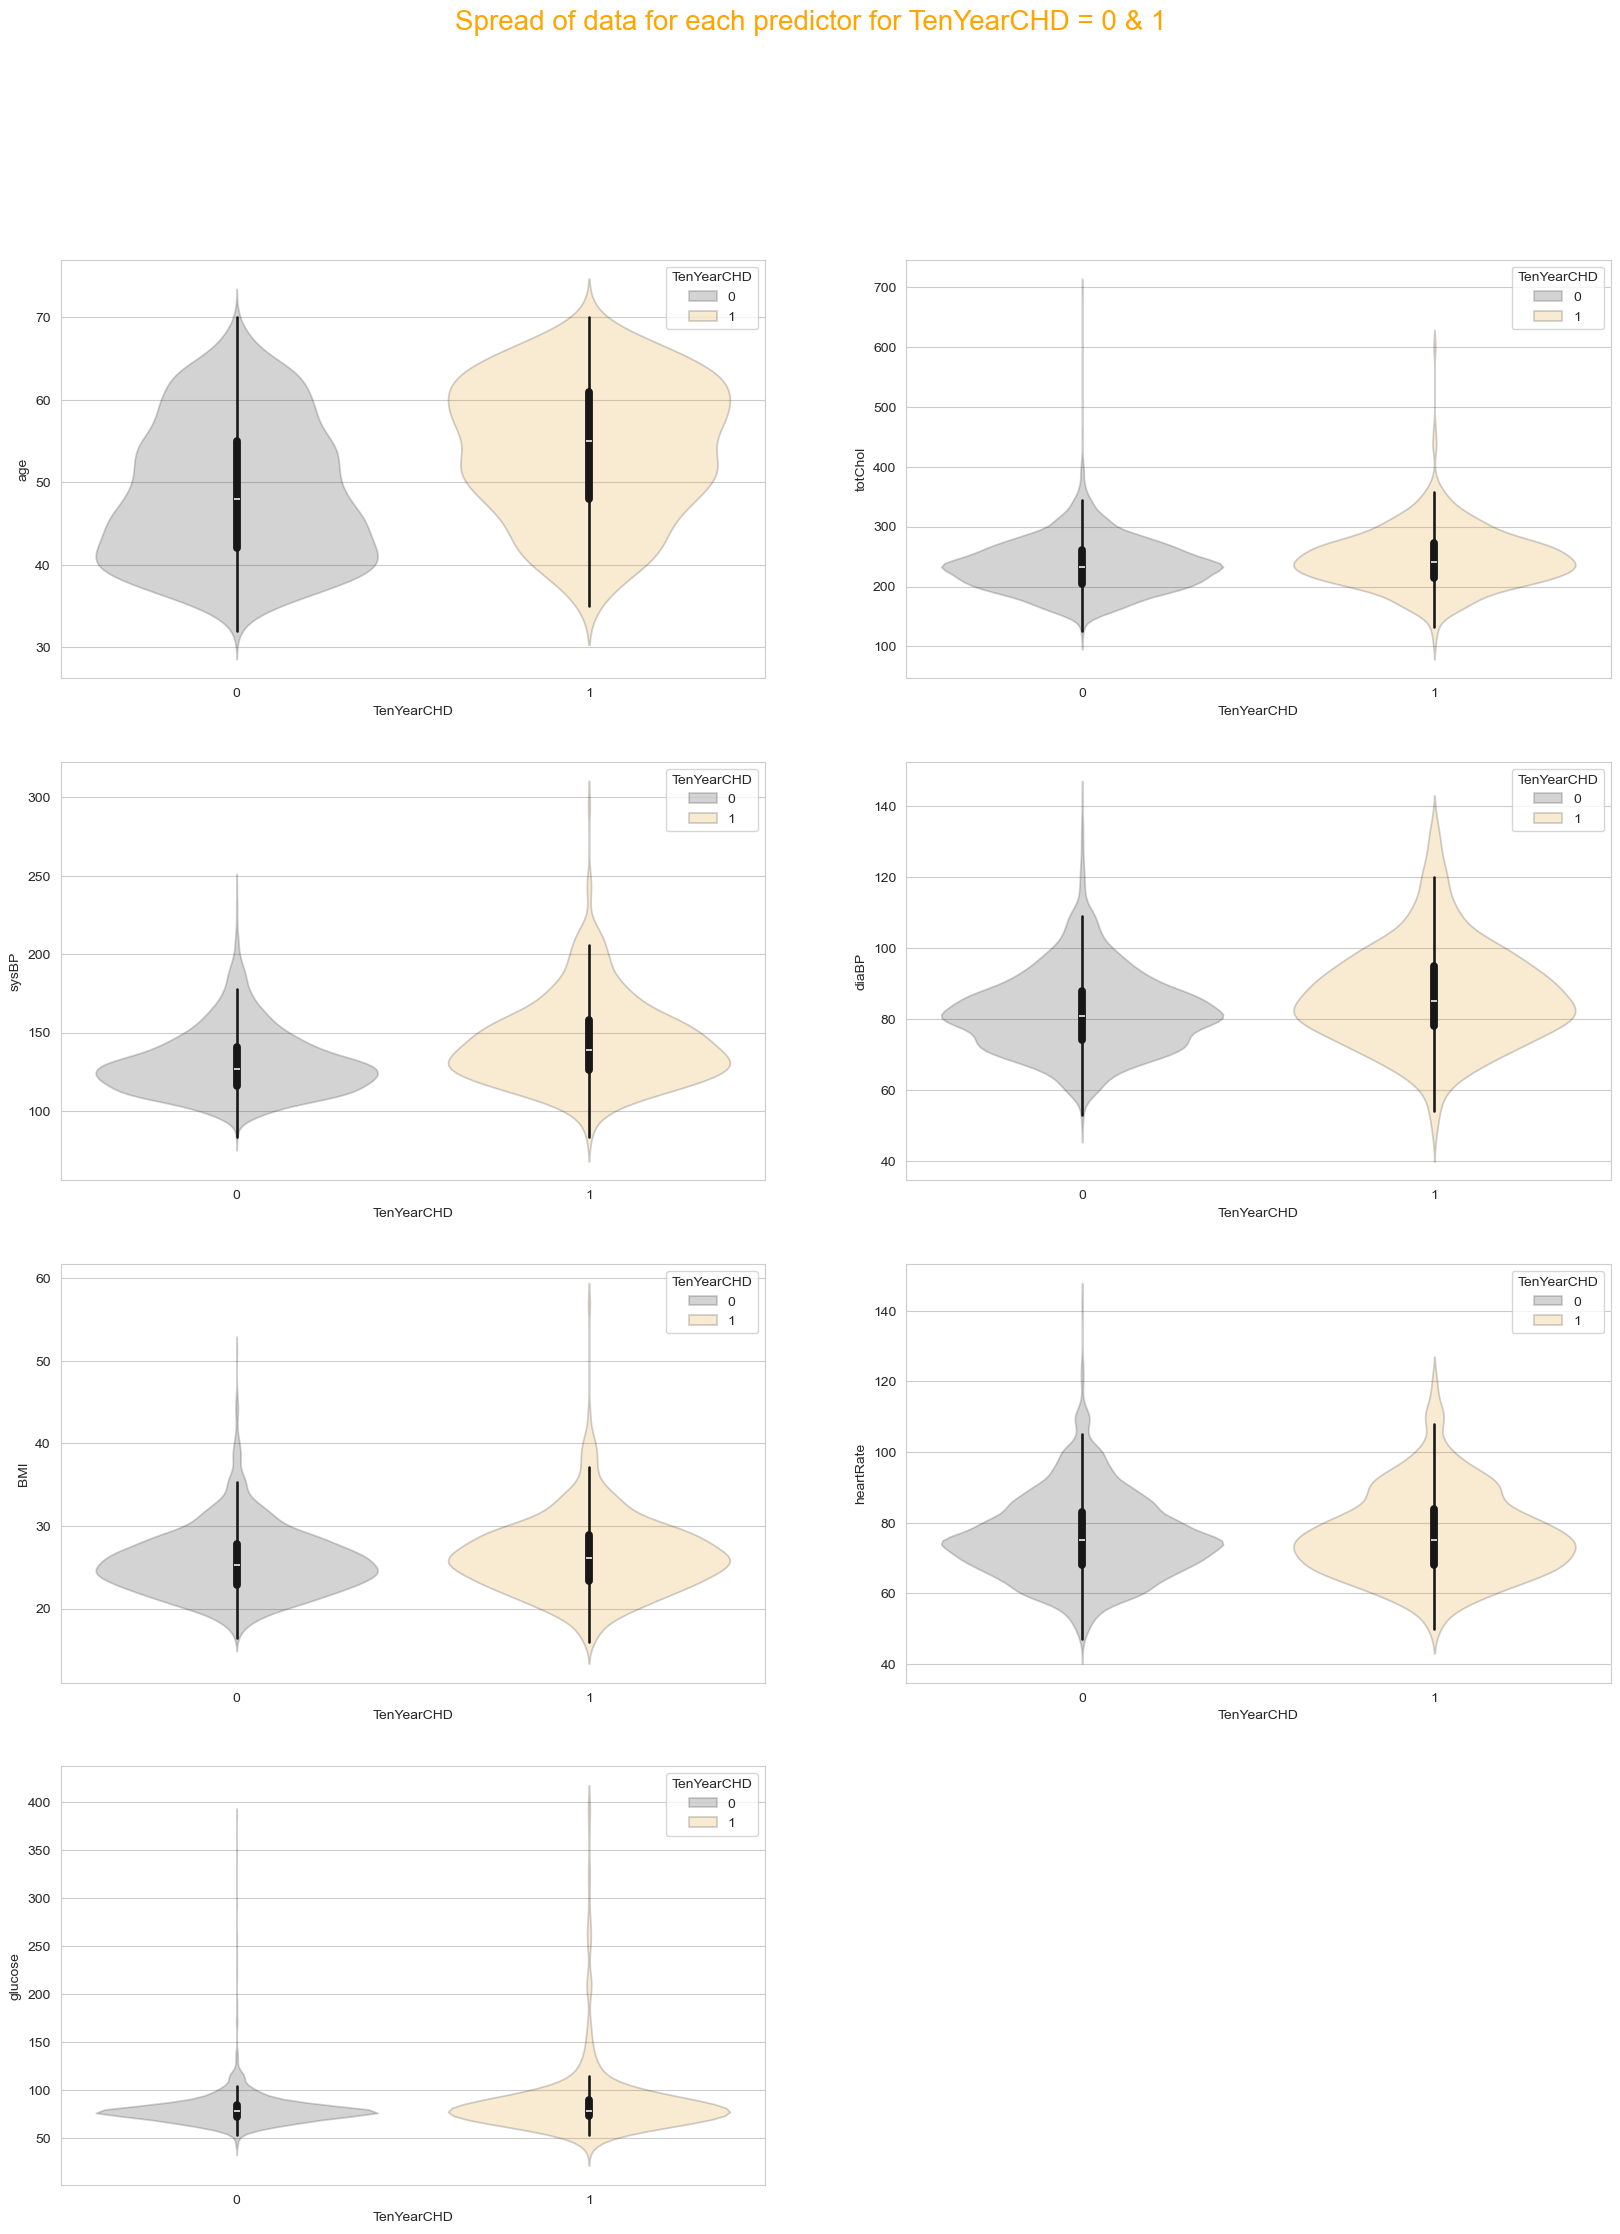

In [27]:
# Spread of data via violin plot by Target variable
plt.figure(figsize=(20,25))
for idx, col in enumerate(cont[:]):
    plt.subplot(4,2,idx+1)
    sns.violinplot(x= df.TenYearCHD,y=df[col], hue=df.TenYearCHD, alpha=0.2,color='orange') 
    plt.xlabel('TenYearCHD') #xlabel
    plt.ylabel(col) #ylabel
plt.suptitle('Spread of data for each predictor for TenYearCHD = 0 & 1', size=20,color='orange')
plt.show()


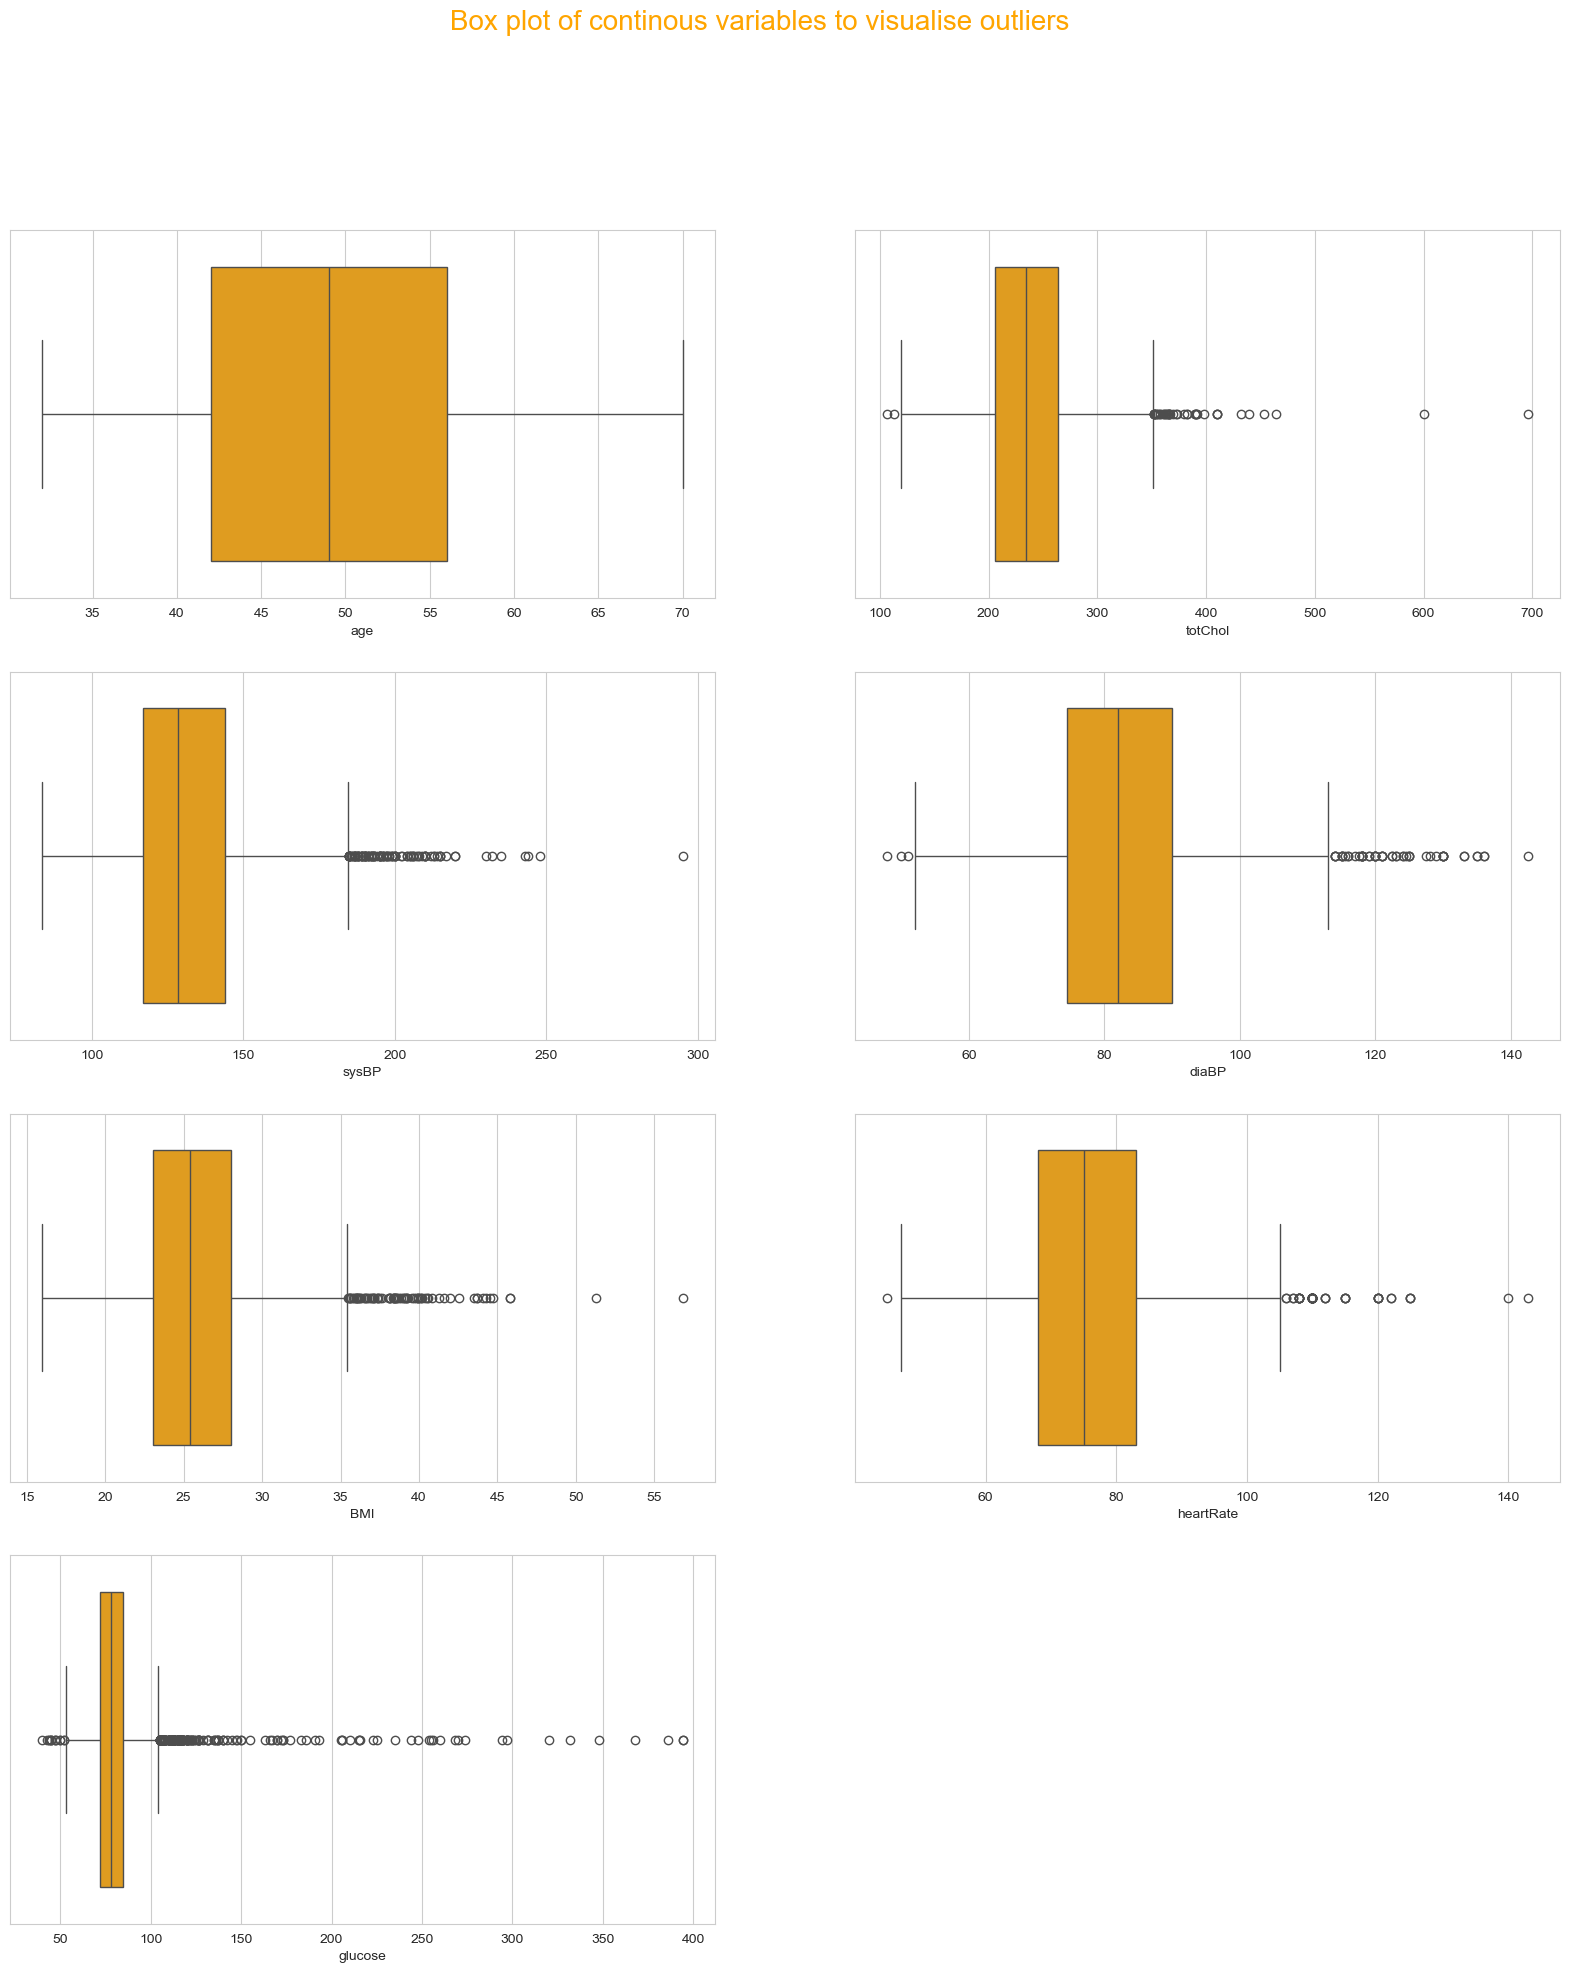

In [28]:
# Box plot of continous variables to visualise outliers
plt.figure(figsize=(20,22))
for idx , i in enumerate(cont[:]):
    plt.subplot(4,2,idx+1)
    sns.boxplot(x=df[i],color='orange')
   
plt.suptitle('Box plot of continous variables to visualise outliers', size=20,color='orange')
plt.show()


- There are outliers in the columns 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'
- It would not be wise to drop them as there can be people who have high readings due to various health conditions
- Moreover these outliers or extreme values could serve a great purpose in our classification problem.

#### Corrlation heatmap to show corelated features

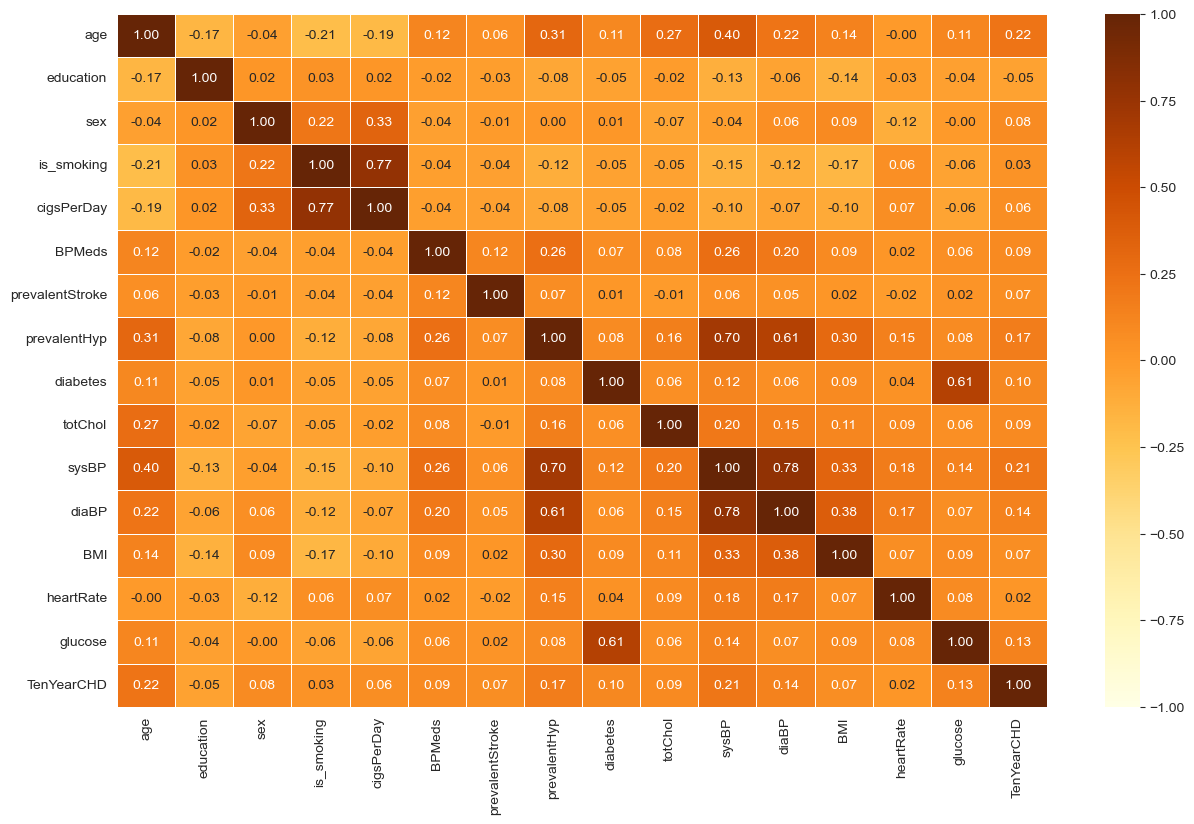

In [29]:
# Correlation plot using heatmap
cor = df.corr()
plt.figure(figsize=(15,9))
sns.heatmap(cor,annot=True,vmin = -1, vmax = 1, cmap="YlOrBr", linewidths=.5,fmt='.2f')
plt.show()

- is_smoking is correlated with cigs perday as is_smoking= no will have cigs per day =0 & is smoking =yes will have cigs per day > 0
- diabetes is rellated to glucose as a person with diabetes will have more sugar glucose levels
- prevalent hyper tension is related to sysbp & diabp as hyper tention patients have higher blood pressure readings


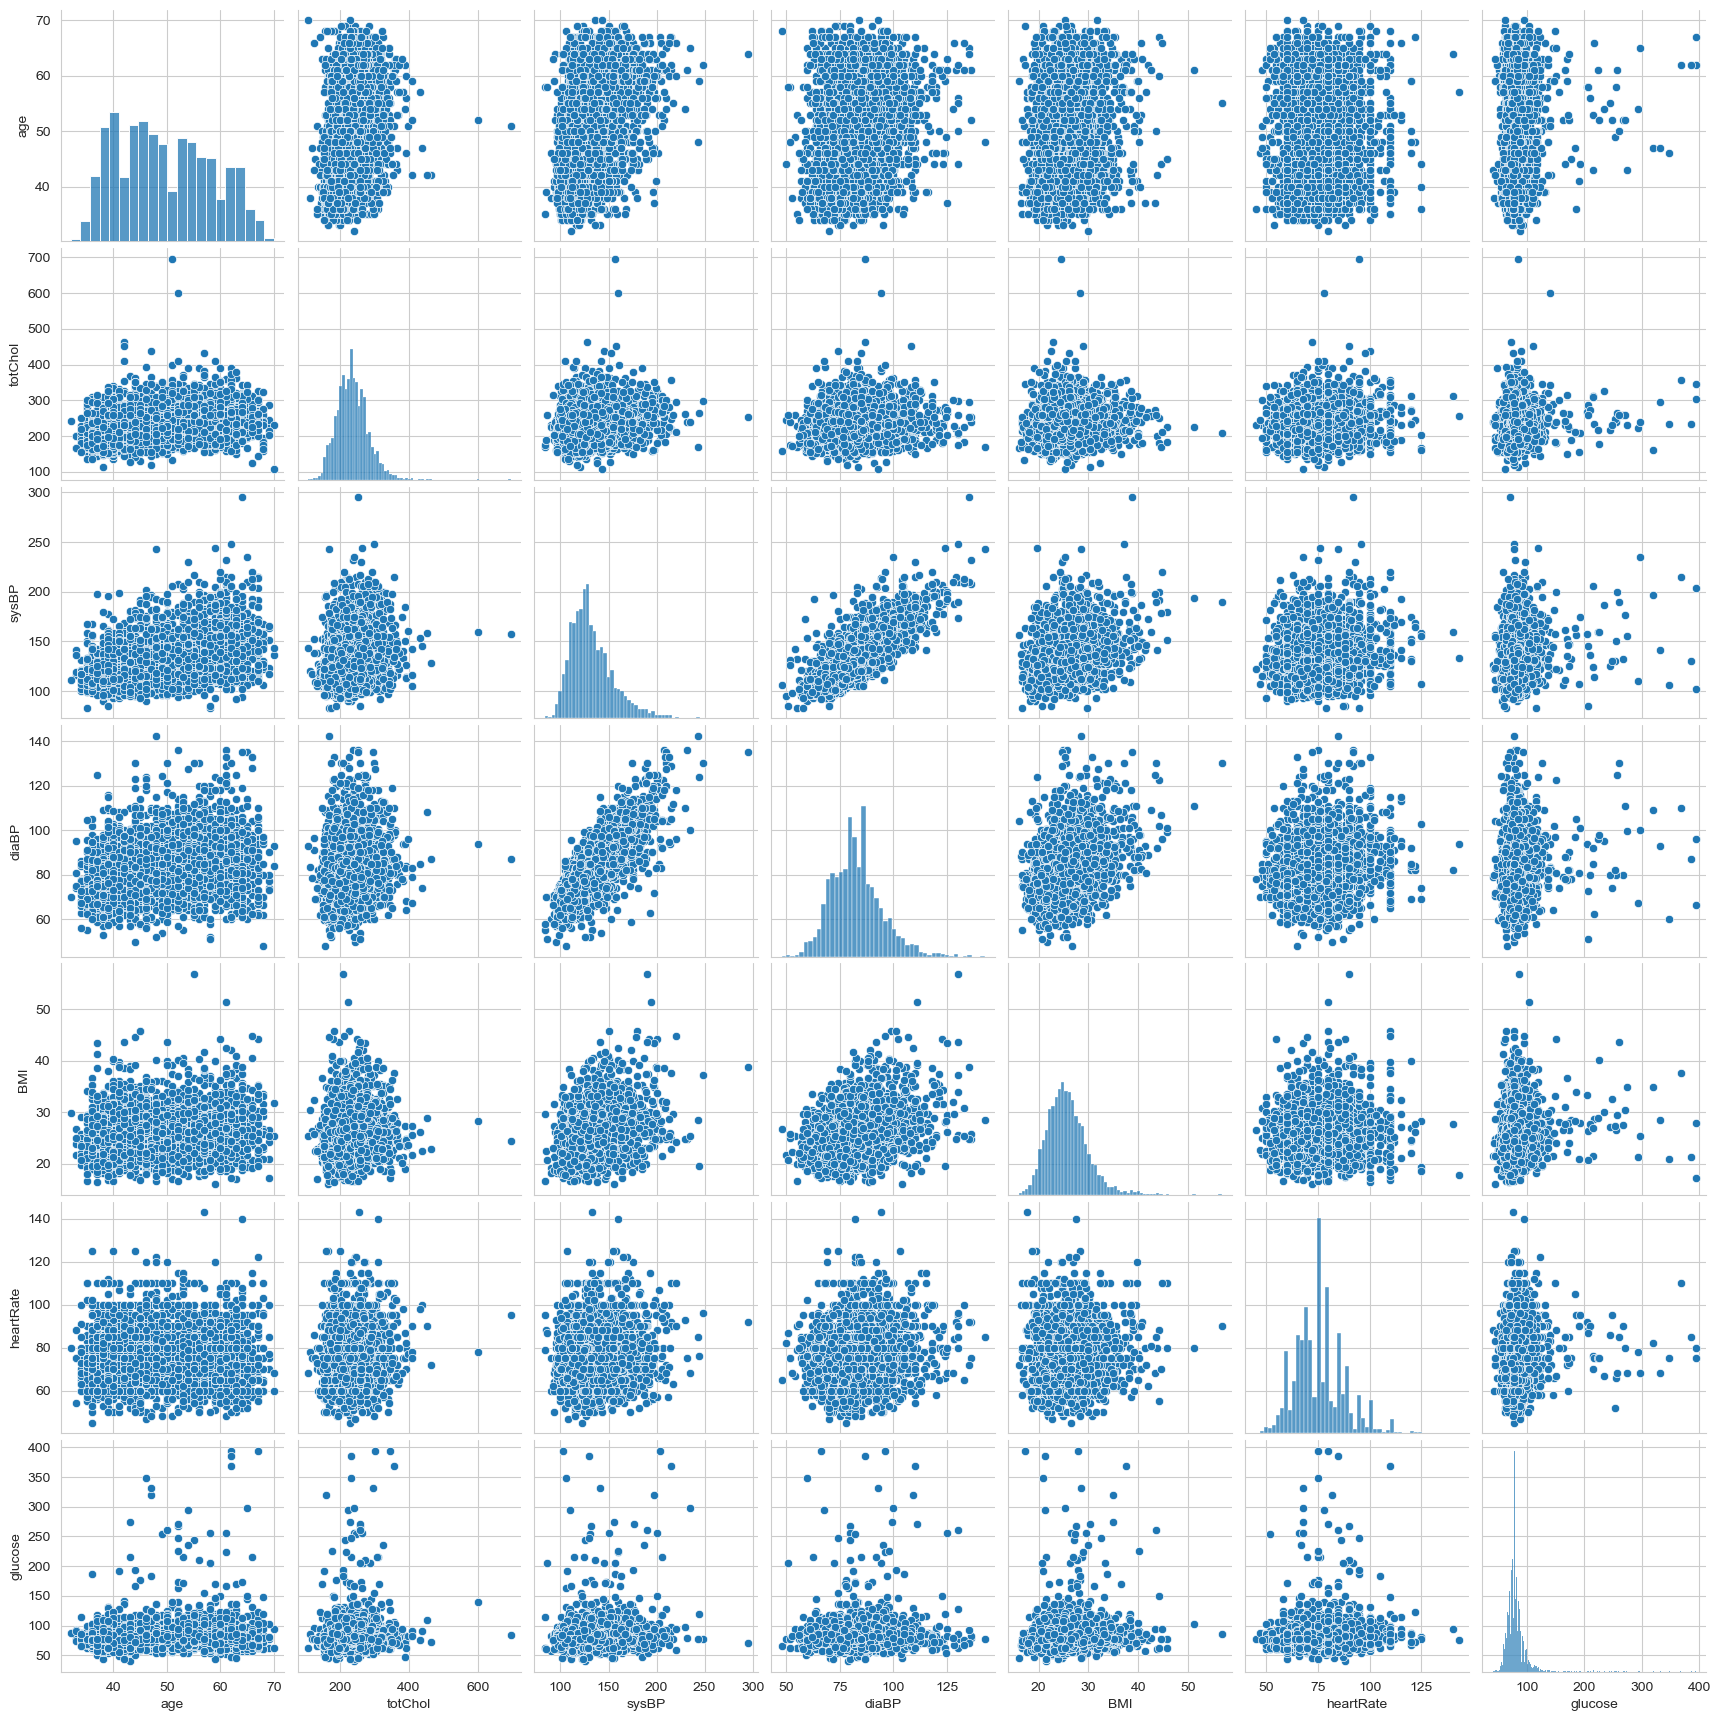

In [30]:
sns.pairplot(data=df[cont]) #pair wise scatter plot inference

## Target Variable:

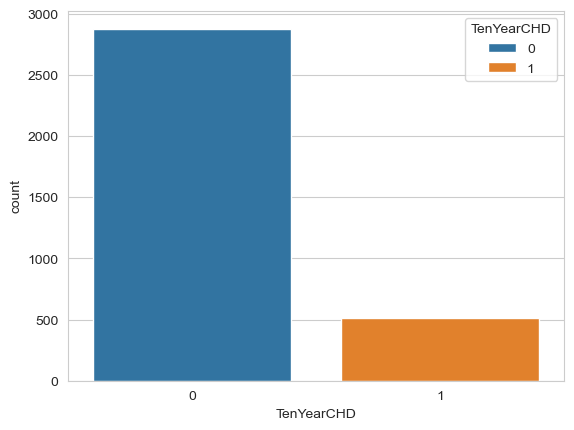

Imbalance Percentage% :
 TenYearCHD
0    84.926254
1    15.073746
Name: proportion, dtype: float64


In [31]:
# Ploting the ratio
sns.countplot(x=df['TenYearCHD'],hue=df['TenYearCHD'])
plt.show()
print('Imbalance Percentage% :\n',df.TenYearCHD.value_counts(normalize=True)*100)

- The chart shows that 15% of the group had Heart disease.
- The data is imbalancd over target hence data imbalance has to be handled.

### Splitting the data into features & target:

In [32]:
X = df.drop(['TenYearCHD'], axis=1)
y = df['TenYearCHD']

### Handling imbalance

In [33]:
# Using SMOTE for oversampling to fix imbalance

sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

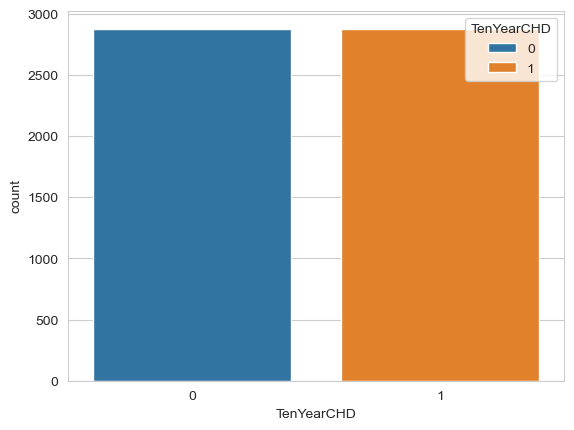

Imbalance Percentage% :
 TenYearCHD
1    50.0
0    50.0
Name: proportion, dtype: float64


In [34]:
# Ploting the ratio of target after SMOTE
sns.countplot(x=y,hue=y)
plt.show()
print('Imbalance Percentage% :\n',y.value_counts(normalize=True)*100)

- Observation : Data imbalance is now handled

### Standardization due to variation in scales:

In [35]:
#standerdization of predictors

scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

In [36]:
X.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.546312,0.125789,-0.788073,1.070937,-0.568547,-0.237593,-0.061931,-0.718096,-0.177567,-0.436577,0.467358,0.045570,-0.154901,1.217745,-0.137934
1,-1.825786,2.150068,1.268918,-0.933762,-0.818879,-0.237593,-0.061931,1.392571,-0.177567,-0.630252,1.302335,1.090403,0.963677,-0.352657,-0.296976
2,-0.621466,-0.886350,-0.788073,1.070937,0.015562,-0.237593,-0.061931,-0.718096,-0.177567,0.187486,-0.868605,-1.079636,-1.436552,1.043256,0.307384
3,-0.139737,-0.886350,1.268918,1.070937,0.850003,-0.237593,-0.061931,1.392571,-0.177567,-0.178344,0.884847,0.286685,0.578927,-0.701635,0.307384
4,1.546312,-0.886350,-0.788073,1.070937,1.684444,-0.237593,-0.061931,-0.718096,-0.177567,-0.006189,-0.012754,0.045570,0.110092,-0.527146,-0.233359


## Feature selection using mutual info gain

In [37]:
mutual_info = mutual_info_classif(X,y)
mutual_info=pd.Series(mutual_info)
mutual_info.index=X.columns
mutual_info.sort_values(ascending=False)

glucose            0.359489
diaBP              0.357731
heartRate          0.341073
sysBP              0.318248
totChol            0.311270
education          0.254780
cigsPerDay         0.178811
BMI                0.091109
age                0.055526
BPMeds             0.038461
prevalentHyp       0.012365
prevalentStroke    0.010055
is_smoking         0.002080
sex                0.001537
diabetes           0.000000
dtype: float64

REMOVING COLUMNS WITH LEAST INFO GAIN (<0.001)

- 1 is_smoking --> information already in cigs per day ( if is_smoking is 0 cigs per day is 0 else >0 )
- 2 diabetes --> information correlated to glucose as diabetic patients have higher glucose levels
- 3 prevalent stroke --> low info gain score
- 4 prevalent Hyp --> hypertention in related to high blood pressure which info is already contained in diaBP & sysBP

In [38]:
# dropping low info gain score features
drop_fs=['is_smoking','diabetes','prevalentStroke','prevalentHyp']
X_final=X.drop(drop_fs,axis=1)
y_final=y

In [39]:
X_final

,age,education,sex,cigsPerDay,BPMeds,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.546312,0.125789,-0.788073,-0.568547,-0.237593,-0.436577,0.467358,0.045570,-0.154901,1.217745,-0.137934
1,-1.825786,2.150068,1.268918,-0.818879,-0.237593,-0.630252,1.302335,1.090403,0.963677,-0.352657,-0.296976
2,-0.621466,-0.886350,-0.788073,0.015562,-0.237593,0.187486,-0.868605,-1.079636,-1.436552,1.043256,0.307384
3,-0.139737,-0.886350,1.268918,0.850003,-0.237593,-0.178344,0.884847,0.286685,0.578927,-0.701635,0.307384
4,1.546312,-0.886350,-0.788073,1.684444,-0.237593,-0.006189,-0.012754,0.045570,0.110092,-0.527146,-0.233359
...,...,...,...,...,...,...,...,...,...,...,...
5753,1.185016,0.398110,1.268918,1.026495,-0.237593,-0.612849,2.867169,3.445935,-0.170113,0.949362,-0.134273
5754,0.703287,-0.187001,-0.788073,-0.732394,-0.237593,0.710225,0.650298,0.502201,2.377487,1.409658,0.828467
5755,1.305448,-0.686971,-0.788073,-0.818879,-0.237593,0.101408,-0.802813,-1.224547,-0.539293,-1.135230,-0.201550
5756,0.462423,-0.421048,-0.788073,-0.435269,2.309464,0.602780,0.640093,0.186501,-0.016646,-0.291464,0.390749


### Splitting the data into train and test with significant features:

In [40]:
#splitting the data set into train/validation set(80-20%) with random state=42
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, train_size=0.80,random_state=42)


### Custom evaluation & auc function

In [57]:
def evaluate(y_true,y_pred):
    confusion = confusion_matrix(y_true, y_pred ) #confusion matrix
    print(confusion) 
    sns.heatmap(confusion/np.sum(confusion), annot=True, 
            fmt='.2%',linewidth=1,vmin = -0.1, vmax = 1.05, cmap="YlOrBr") #heatmap of confusion matrix
    plt.show()
    print(f'Accuracy on data : {accuracy_score(y_true, y_pred)*100:.2f}%')
    print(f'F1 Score on data : {f1_score(y_true, y_pred):.2f}')
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    print('Sensitivity/Recall/TPR',(TP / float(TP+FN)))
    print('Precision',(TP / float(TP+FP)))

In [42]:
# defining AREA UNDER CURVE function
def ROC( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.01, 1.05])
    plt.ylim([-0.01, 1.05])
    plt.xlabel('FP Rate or [1 - TN Rate]',color='blue')
    plt.ylabel('TP Rate',color='blue')
    plt.title('ROC Curve',color='r')
    plt.legend(loc="best")
    plt.show()

    return None

# MODEL BUILDING

## Logistic regression classifier

In [43]:

logreg = LogisticRegression()#creating model instance
logreg.fit(X_train, y_train) #training the baseline mode

LogisticRegression()

[[1503  787]
 [ 740 1576]]


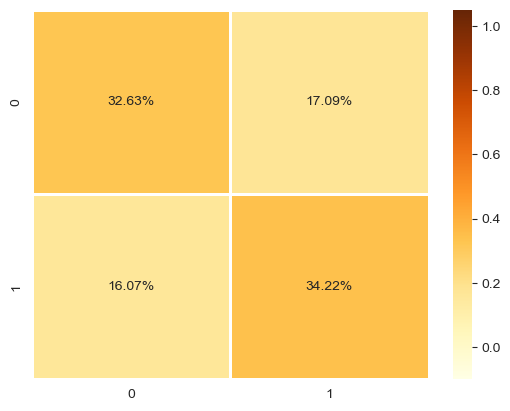

Accuracy on data : 66.85%
F1 Score on data : 0.67
Sensitivity/Recall/TPR 0.6804835924006909
Precision 0.6669487939060517


In [58]:
y_train_logreg = logreg.predict(X_train)
evaluate(y_train, y_train_logreg)

[[378 211]
 [194 369]]


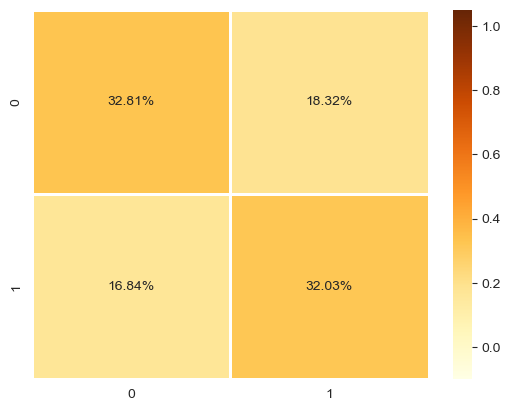

Accuracy on data : 64.84%
F1 Score on data : 0.65
Sensitivity/Recall/TPR 0.655417406749556
Precision 0.6362068965517241


In [59]:
#Prediction on validation data

y_test_logreg = logreg.predict(X_test)
evaluate(y_test, y_test_logreg)

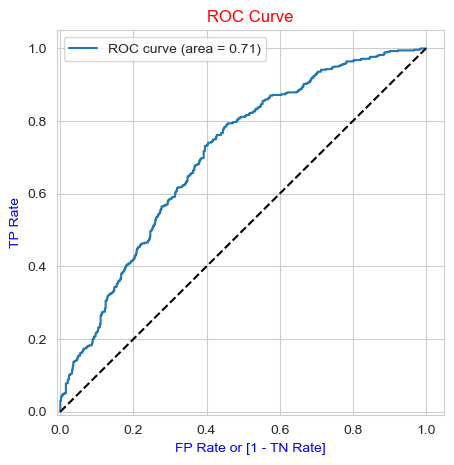

In [60]:
#ROC AUC plot for baseline logistic reg model
y_proba_logreg = logreg.predict_proba(X_test)[:,1]
ROC(y_test, y_proba_logreg)

# -----------------------------------------------------------------------------------------

### Decision Tree:

In [61]:
dtree = DecisionTreeClassifier(max_depth=12,random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=12, random_state=42)

[[2141  149]
 [  81 2235]]


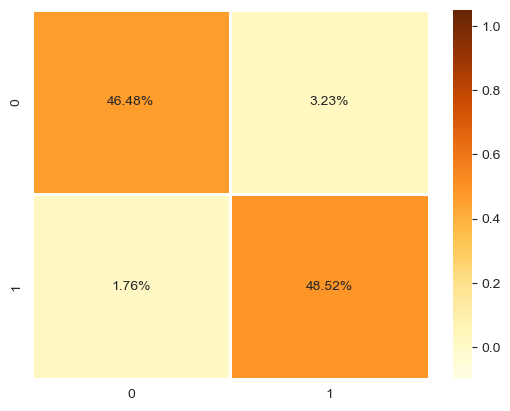

Accuracy on data : 95.01%
F1 Score on data : 0.95
Sensitivity/Recall/TPR 0.9650259067357513
Precision 0.9375


In [62]:
#evaluate on train data
y_train_pred_dt = dtree.predict(X_train)
evaluate(y_train,y_train_pred_dt)

[[457 132]
 [ 93 470]]


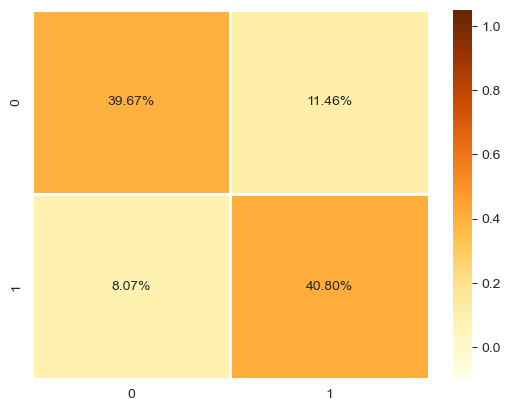

Accuracy on data : 80.47%
F1 Score on data : 0.81
Sensitivity/Recall/TPR 0.8348134991119005
Precision 0.7807308970099668


In [63]:
#evaluate on validation data
y_test_pred_dt = dtree.predict(X_test)
evaluate(y_test, y_test_pred_dt)

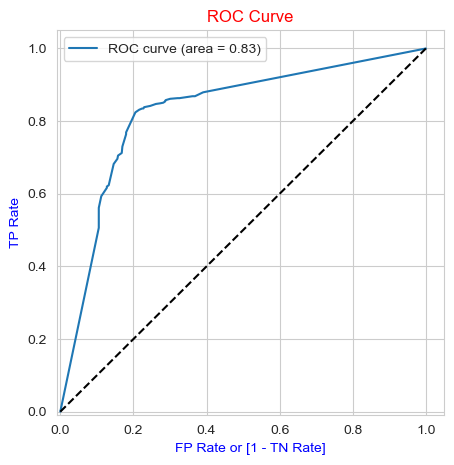

In [64]:
y_proba_dt = dtree.predict_proba(X_test)[:,1] #prediction probability
ROC(y_test, y_proba_dt) #ROC_AUC curve

# -----------------------------------------------------------------------------------------

### Hyperparameter tuning for Decision Tree CLassifier:
- "max_depth": [15,20,25],
- "min_samples_leaf": [2, 3, 5],
- 'criterion': ['entropy','gini']

In [65]:
# parameters
params = {
    "max_depth":[15,20,25],
    "min_samples_leaf": [2,3,5],
    'criterion': ['entropy','gini'],
         }
#performing cross validation with 4 folds
grid_search = GridSearchCV(estimator=dtree,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="recall")

grid_search.fit(X_train, y_train) #training the model

Fitting 4 folds for each of 18 candidates, totalling 72 fits


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(max_depth=12, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [15, 20, 25],
                         'min_samples_leaf': [2, 3, 5]},
             scoring='recall', verbose=1)

In [66]:
#cross validation result
print(grid_search.best_score_) #best f1 score
dtree_best_est = grid_search.best_estimator_
print(dtree_best_est)
dtree_best_params = grid_search.best_params_
print(dtree_best_params)

0.7797927461139897
DecisionTreeClassifier(criterion='entropy', max_depth=25, min_samples_leaf=3,
                       random_state=42)
{'criterion': 'entropy', 'max_depth': 25, 'min_samples_leaf': 3}


[[2212   78]
 [ 100 2216]]


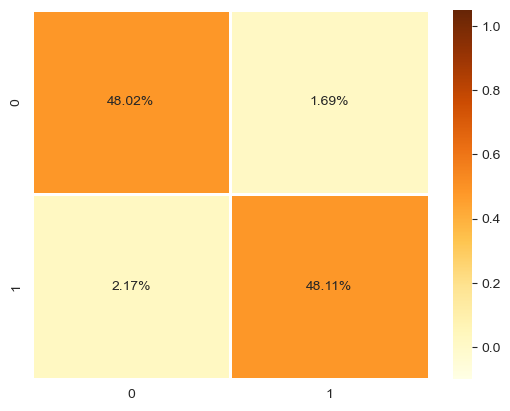

Accuracy on data : 96.14%
F1 Score on data : 0.96
Sensitivity/Recall/TPR 0.9568221070811744
Precision 0.9659982563208369


In [67]:
#evaluate on train data
y_train_pred_dtree = dtree_best_est.predict(X_train)
evaluate(y_train,y_train_pred_dtree)

[[491  98]
 [107 456]]


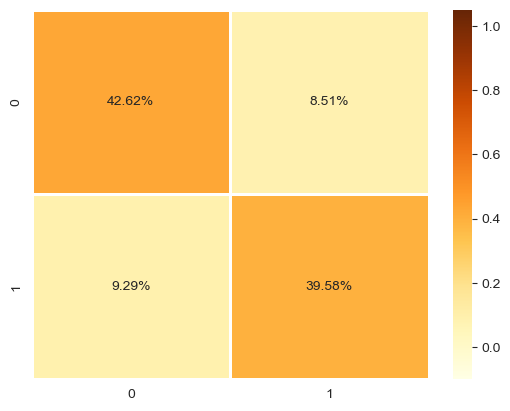

Accuracy on data : 82.20%
F1 Score on data : 0.82
Sensitivity/Recall/TPR 0.8099467140319716
Precision 0.8231046931407943


In [68]:
#evaluate on validation data
y_test_pred_dtree = dtree_best_est.predict(X_test)
evaluate(y_test, y_test_pred_dtree)

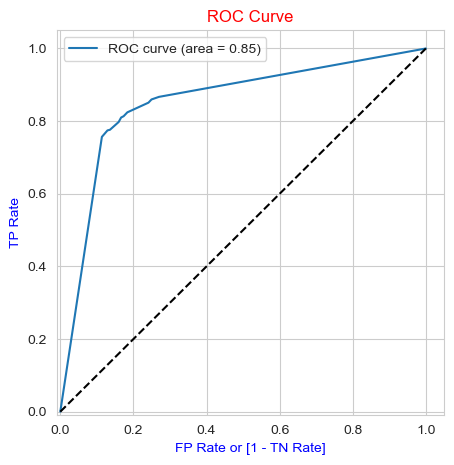

In [69]:
y_proba_dt = dtree_best_est.predict_proba(X_test)[:,1] #prediction probability
ROC(y_test, y_proba_dt) #ROC_AUC curve

# -----------------------------------------------------------------------------------

## Random Forest CLassifier (Hyperparameter tuning):
- "max_depth": [15,20,25],
- "min_samples_leaf": [2, 3, 5],
- 'n_estimators': [75 ,100,125],
- 'criterion': ['entropy','gini']

In [70]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# parameters
params = {
    "max_depth": [15,20,25],
    "min_samples_leaf": [2,3,5],
    'criterion': ['entropy','gini'],
    'n_estimators': [75,100,125],
         }
#performing cross validation with 4 folds
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="recall")

grid_search.fit(X_train, y_train) #training the model

Fitting 4 folds for each of 54 candidates, totalling 216 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [15, 20, 25],
                         'min_samples_leaf': [2, 3, 5],
                         'n_estimators': [75, 100, 125]},
             scoring='recall', verbose=1)

In [71]:
# cross validation result
print(grid_search.best_score_) #best f1 score
rf_best_est = grid_search.best_estimator_ #best params
print(rf_best_est)
rf_best_params = grid_search.best_params_
print(rf_best_params)

0.8739205526770294
RandomForestClassifier(criterion='entropy', max_depth=25, min_samples_leaf=2,
                       n_jobs=-1, random_state=42)
{'criterion': 'entropy', 'max_depth': 25, 'min_samples_leaf': 2, 'n_estimators': 100}


[[2290    0]
 [   4 2312]]


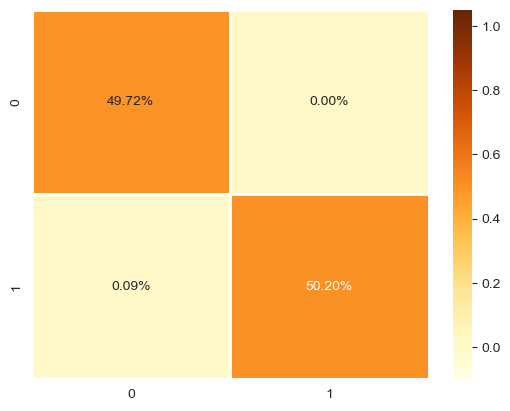

Accuracy on data : 99.91%
F1 Score on data : 1.00
Sensitivity/Recall/TPR 0.998272884283247
Precision 1.0


In [72]:
#evaluate on train data
y_train_pred_rf = rf_best_est.predict(X_train)
evaluate(y_train,y_train_pred_rf)

[[528  61]
 [ 55 508]]


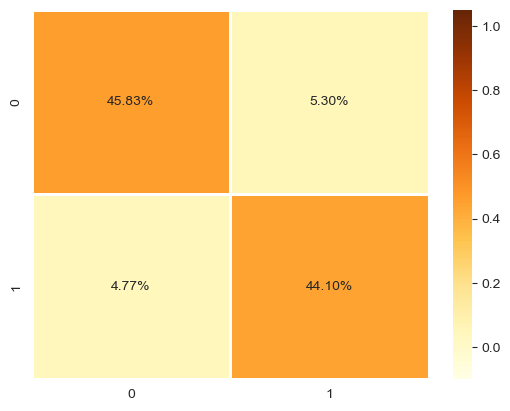

Accuracy on data : 89.93%
F1 Score on data : 0.90
Sensitivity/Recall/TPR 0.9023090586145648
Precision 0.8927943760984183


In [73]:
#evaluate on validation data
y_test_pred_rf = rf_best_est.predict(X_test)
evaluate(y_test, y_test_pred_rf)

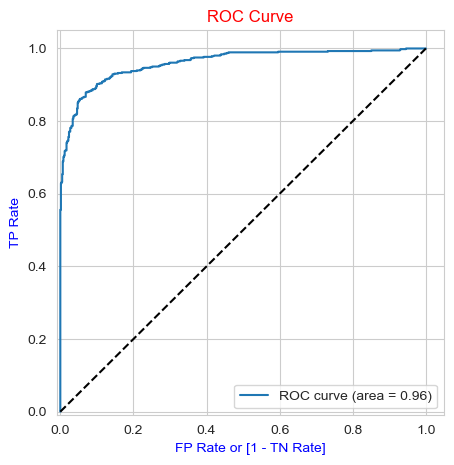

In [74]:
y_proba_rf = rf_best_est.predict_proba(X_test)[:,1] #prediction probability
ROC(y_test, y_proba_rf) #ROC_AUC curve

# -----------------------------------------------------------------------------------

## ADABOOST 

In [75]:
# shallow tree as weak learner
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state = 100)

# Fit the shallow decision tree 
shallow_tree.fit(X_train, y_train)

# Test error
y_pred = shallow_tree.predict(X_test) 
score = recall_score(y_test, y_pred) # recall score as metrics
score

0.6856127886323268

In [76]:
# Adaboost with shallow tree as base estimator

# number of trees to be used or estimators
estimators = list(range(1, 150, 10))

# Loop through the estimators
adaboost_scores = []
for num_est in estimators:
    adaboost = AdaBoostClassifier(base_estimator=shallow_tree, n_estimators = num_est, random_state=42)
    
    adaboost.fit(X_train, y_train)
    y_pred = adaboost.predict(X_test)
    score = recall_score(y_test, y_pred) # recall score as metrics
    adaboost_scores.append(score)

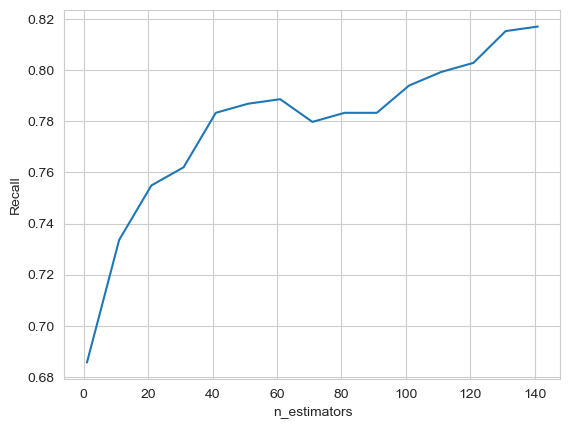

In [77]:
# Plot of scores corrosponding to number of estimators to find the best possible number of estimator
plt.plot(estimators, adaboost_scores)
plt.xlabel('n_estimators')
plt.ylabel('Recall')
plt.show()

In [78]:
adaboost_best = AdaBoostClassifier(base_estimator=shallow_tree, n_estimators = 130, random_state=42)
adaboost_best.fit(X_train, y_train) #training the model

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=100),
                   n_estimators=130, random_state=42)

[[2224   66]
 [ 222 2094]]


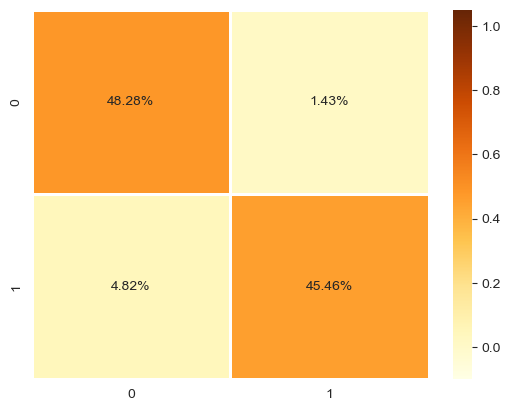

Accuracy on data : 93.75%
F1 Score on data : 0.94
Sensitivity/Recall/TPR 0.9041450777202072
Precision 0.9694444444444444


In [79]:
y_train_pred_ada = adaboost.predict(X_train)
#evaluate on training data
evaluate(y_train, y_train_pred_ada)

[[524  65]
 [103 460]]


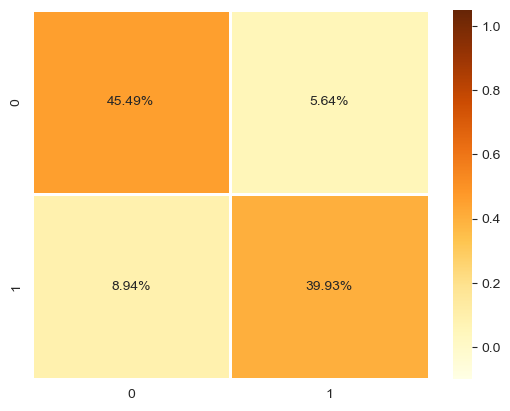

Accuracy on data : 85.42%
F1 Score on data : 0.85
Sensitivity/Recall/TPR 0.8170515097690941
Precision 0.8761904761904762


In [80]:
y_test_pred_ada = adaboost.predict(X_test)
#evaluate on validation data
evaluate(y_test, y_test_pred_ada)

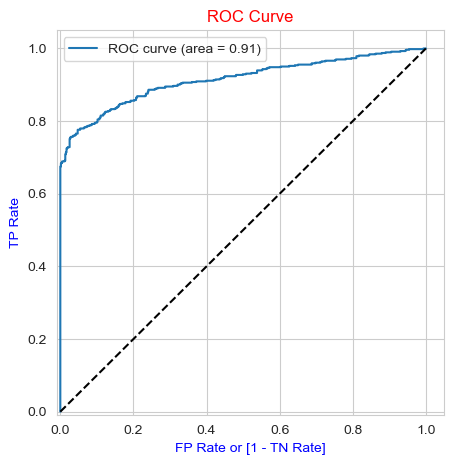

In [81]:
y_proba_ada = adaboost_best.predict_proba(X_test)[:,1] #prediction probability
ROC(y_test, y_proba_ada) #ROC_AUC curve

# -----------------------------------------------------------------------------------

# RESULTS OF ALL MODELS
- RECALL IS PUT IN THESE RESULTS AS WE NEED TO MINIMISE THE FALSE NEGATIVE RATE AS A ACTUAL POSITIVE RISK SHOULD NOT BE PREDICTED AS NEGATIVE.
- 
### 1. Logistic regression: 
   - ROC/AUC: 0.71
   - F1 Score: 0.65
   - Recall:0.65
   
### 2. Decision Tree Classifier Model: 
   - ROC/AUC: 0.83
   - F1 Score: 0.81
   - Recall:0.83

### 2. Hyperparameter tuning for Decision Tree Classifier:
   - ROC/AUC: 0.85
   - F1 Score: 0.82
   - Recall:0.81
     
   
### 4. Hyperparameter tuning for Random Forest CLassifier:
   - ROC/AUC: 0.96
   - F1 Score: 0.90
   - Recall:0.91
     
### 5. AdaBoost Classifier Model: 
   - ROC/AUC: 0.91
   - F1 Score: 0.85
   - Recall:0.81
     

# BEST MODEL - RANDOM FOREST CLASSIFIER (HYPERPARAMETER TUNING)
- I HAVE FOUND RANDOM FOREST CLASSIFIER WITH HYPERPARAMETER TUNING TO BE THE BEST MODEL FOR PROBLEM WITH BELOW RESULTS
- MOREOVER WE NEED TO MINIMISE THE FALSE NEGATIVE RATE AS A ACTUAL POSITIVE RISK SHOULD NOT BE PREDICTED AS NEGATIVE WHEREAS AN ACTUAL NON RISK PREDICTED AS POSITIVE WONT BE MUCH OF A CONCERN SO RECALL & FALSE NEGATIVES ARE ALSO BEST IN RANDOM FOREST CLASSIFIER

- ACCURACY  --> 89 %
- F1 SCORE  --> 90 %
- RECALL    --> 91 %
- PRECISION --> 89 %
- AUC / ROC --> 96 %
- FLASE NEGATIVES --> 4.7 %